In [230]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch, Rectangle

import plotly as py
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

import plotly.io as pio
pio.renderers.default = "browser"




import plotly.graph_objects as go
from dash import Dash, dcc, html, Input, Output

pd.set_option("display.max_columns", None)
defending = pd.read_csv("../data/processed/fbref/ENG-Premier League/2025-2026/player_match/defense.csv")
szn_defending = pd.read_csv("../data/processed/fbref/ENG-Premier League/2025-2026/player_season/defense.csv")
passing = pd.read_csv("../data/processed/fbref/ENG-Premier League/2025-2026/player_season/passing.csv")
pass_type = pd.read_csv("../data/processed/fbref/ENG-Premier League/2025-2026/player_season/passing_types.csv")
szn_misc = pd.read_csv("../data/processed/fbref/ENG-Premier League/2025-2026/player_season/misc.csv")
matchday = pd.read_csv("../data/processed/fbref/ENG-Premier League/2025-2026/team_match/defense.csv")
misc =  pd.read_csv("../data/processed/fbref/ENG-Premier League/2025-2026/player_match/misc.csv")

shooting = pd.read_csv("../data/processed/fbref/ENG-Premier League/2025-2026/player_season/shooting.csv")



defending_df = pd.DataFrame(defending)
szn_defending_df = pd.DataFrame(szn_defending)
passing_df = pd.DataFrame(passing)
pass_type_df = pd.DataFrame(pass_type)
matchday_df = pd.DataFrame(matchday)
misc_df = pd.DataFrame(misc)
shooting_df = pd.DataFrame(shooting)

fpl = pd.read_csv("../data/processed/fpl/2025-2026/gws/merged_gws.csv")

fpl_df = pd.DataFrame(fpl)


#add matchday to defending_df
defending_df = defending_df.merge(misc_df[['player_id', 'game_id', 'recov']], left_on=['player_id', 'game_id'], right_on=['player_id', 'game_id'], how='left')
defending_df = defending_df.merge(matchday_df[['round', 'game_id']], left_on='game_id', right_on='game_id', how='left')

#drop duplicate rows by name and game
defending_df = defending_df.drop_duplicates(subset=['player_id', 'game_id'])



In [231]:
#Create defcomp column
defending_df['defcon'] = defending_df['tkl_int'] + defending_df['blocks'] + defending_df['clr']
defending_df.head()





,league,season,game,team,player,jersey_number,nation,pos,age,min,tkl,tklw,def_3rd,mid_3rd,att_3rd,tkl_tkl,att,challenges_tkl,lost,blocks,sh,pass,int,tkl_int,clr,err,game_id,unnamed_27_level_1_season,unnamed_28_level_1_league,game_date,home,away,player_id,team_id,is_home,is_away,opponent_id,position,fpl_pos,is_relegated,recov,round,defcon
0,ENG-Premier League,2526,2025-08-15 Liverpool-Bournemouth,BOU,Adam Smith,15,ENG,RB,34,89,1,0,0,1,0,0,0,NaN,0,0,0,0,1,2,7,0,a071faa8,2025-2026,ENG-Premier League,2025-08-15,LIV,BOU,8c76756e,911e7464,0,1,11d190e7,DEF,DEF,0,2,Matchweek 1,9
2,ENG-Premier League,2526,2025-08-15 Liverpool-Bournemouth,BOU,Adrien Truffert,3,FRA,LB,23,90,2,2,1,0,1,1,1,100.0,0,1,1,0,0,2,3,0,a071faa8,2025-2026,ENG-Premier League,2025-08-15,LIV,BOU,c6810ee5,911e7464,0,1,11d190e7,DEF,DEF,0,4,Matchweek 1,6
4,ENG-Premier League,2526,2025-08-15 Liverpool-Bournemouth,BOU,Alex Scott,8,ENG,CM,21,73,0,0,0,0,0,0,0,NaN,0,0,0,0,1,1,0,0,a071faa8,2025-2026,ENG-Premier League,2025-08-15,LIV,BOU,3bb5fbe3,911e7464,0,1,11d190e7,MID,MID,0,2,Matchweek 1,1
6,ENG-Premier League,2526,2025-08-15 Liverpool-Bournemouth,BOU,Antoine Semenyo,24,GHA,RM,25,90,1,1,1,0,0,0,0,NaN,0,3,0,3,1,2,0,0,a071faa8,2025-2026,ENG-Premier League,2025-08-15,LIV,BOU,77ba57bf,911e7464,0,1,11d190e7,MID,MID,0,3,Matchweek 1,5
8,ENG-Premier League,2526,2025-08-15 Liverpool-Bournemouth,BOU,Bafodé Diakité,18,FRA,CB,24,90,2,2,2,0,0,2,2,100.0,0,1,0,1,1,3,6,0,a071faa8,2025-2026,ENG-Premier League,2025-08-15,LIV,BOU,87925a1b,911e7464,0,1,11d190e7,DEF,DEF,0,8,Matchweek 1,10


In [232]:

#filter the top 20 defensive contributions
midfielders = defending_df[defending_df['position'] == 'MID']
fpl_mids = fpl_df[fpl_df['position'] == 'MID']
players = midfielders.sort_values(by='defcon', ascending=False).head(30)

szn_mids = szn_defending_df[szn_defending_df['position'] == 'MID']
szn_mids = szn_mids.merge(szn_misc[['player_id', 'recov']], left_on='player_id', right_on='player_id', how='left')

szn_mids = szn_mids[szn_mids['90s'] > 5]
szn_mids['recov/90'] = szn_mids['recov'] / szn_mids['90s']
szn_mids['tkl_int/90'] = szn_mids['tkl_int'] / szn_mids['90s'] 






mid_defcon = midfielders['defcon'] + midfielders['recov']
midfielders['defcon'] = mid_defcon

display(midfielders)
print(players[['player', 'defcon', 'round']])

C:\Users\oukan\AppData\Local\Temp\ipykernel_80436\690432188.py:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,league,season,game,team,player,jersey_number,nation,pos,age,min,tkl,tklw,def_3rd,mid_3rd,att_3rd,tkl_tkl,att,challenges_tkl,lost,blocks,sh,pass,int,tkl_int,clr,err,game_id,unnamed_27_level_1_season,unnamed_28_level_1_league,game_date,home,away,player_id,team_id,is_home,is_away,opponent_id,position,fpl_pos,is_relegated,recov,round,defcon
4,ENG-Premier League,2526,2025-08-15 Liverpool-Bournemouth,BOU,Alex Scott,8,ENG,CM,21,73,0,0,0,0,0,0,0,NaN,0,0,0,0,1,1,0,0,a071faa8,2025-2026,ENG-Premier League,2025-08-15,LIV,BOU,3bb5fbe3,911e7464,0,1,11d190e7,MID,MID,0,2,Matchweek 1,3
6,ENG-Premier League,2526,2025-08-15 Liverpool-Bournemouth,BOU,Antoine Semenyo,24,GHA,RM,25,90,1,1,1,0,0,0,0,NaN,0,3,0,3,1,2,0,0,a071faa8,2025-2026,ENG-Premier League,2025-08-15,LIV,BOU,77ba57bf,911e7464,0,1,11d190e7,MID,MID,0,3,Matchweek 1,8
10,ENG-Premier League,2526,2025-08-15 Liverpool-Bournemouth,BOU,Ben Winterburn,47,ENG,CM,20,7,0,0,0,0,0,0,0,NaN,0,0,0,0,0,0,0,0,a071faa8,2025-2026,ENG-Premier League,2025-08-15,LIV,BOU,643aca04,911e7464,0,1,11d190e7,MID,MID,0,0,Matchweek 1,0
12,ENG-Premier League,2526,2025-08-15 Liverpool-Bournemouth,BOU,David Brooks,7,WAL,LM,28,83,2,2,0,1,1,0,4,0.0,4,0,0,0,0,2,0,0,a071faa8,2025-2026,ENG-Premier League,2025-08-15,LIV,BOU,a888d251,911e7464,0,1,11d190e7,MID,MID,0,5,Matchweek 1,7
18,ENG-Premier League,2526,2025-08-15 Liverpool-Bournemouth,BOU,Hamed Junior Traorè,25,CIV,"LM,CM",25,17,1,0,1,0,0,1,1,100.0,0,0,0,0,0,1,1,0,a071faa8,2025-2026,ENG-Premier League,2025-08-15,LIV,BOU,5a385cb2,911e7464,0,1,11d190e7,MID,MID,0,2,Matchweek 1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10364,ENG-Premier League,2526,2025-12-22 Fulham-Nott'ham Forest,NFO,Elliot Anderson,8,ENG,DM,23,90,0,0,0,0,0,0,0,NaN,0,2,1,1,1,1,1,0,23ee8b09,2025-2026,ENG-Premier League,2025-12-22,FUL,NFO,683b923f,9942b753,0,1,8ae8b44e,MID,MID,0,10,Matchweek 17,14
10368,ENG-Premier League,2526,2025-12-22 Fulham-Nott'ham Forest,NFO,James Mcatee,24,ENG,AM,23,18,1,1,0,1,0,0,0,NaN,0,0,0,0,0,1,0,0,23ee8b09,2025-2026,ENG-Premier League,2025-12-22,FUL,NFO,68e439a2,9942b753,0,1,8ae8b44e,MID,MID,0,0,Matchweek 17,1
10372,ENG-Premier League,2526,2025-12-22 Fulham-Nott'ham Forest,NFO,Morgan Gibbs-White,10,ENG,AM,25,72,0,0,0,0,0,0,0,NaN,0,2,1,1,0,0,0,0,23ee8b09,2025-2026,ENG-Premier League,2025-12-22,FUL,NFO,c61c1467,9942b753,0,1,8ae8b44e,MID,MID,0,3,Matchweek 17,5
10378,ENG-Premier League,2526,2025-12-22 Fulham-Nott'ham Forest,NFO,Nicolás Domínguez,16,ARG,DM,27,18,0,0,0,0,0,0,0,NaN,0,0,0,0,0,0,0,0,23ee8b09,2025-2026,ENG-Premier League,2025-12-22,FUL,NFO,3f27037d,9942b753,0,1,8ae8b44e,MID,MID,0,1,Matchweek 17,1


                     player  defcon         round
9050       Mateus Fernandes      19  Matchweek 15
848         Yehor Yarmoliuk      16   Matchweek 2
3470       Marshall Munetsi      15   Matchweek 6
26              Tyler Adams      15   Matchweek 1
4814          João Palhinha      15   Matchweek 8
8560     Soungoutou Magassa      15  Matchweek 14
2914                  Rodri      14   Matchweek 5
3296        Florentino Luís      14   Matchweek 6
3400           Granit Xhaka      14   Matchweek 6
6894          Andrey Santos      14  Matchweek 12
2630           James Garner      13   Matchweek 5
7200          João Palhinha      13  Matchweek 12
384          Moisés Caicedo      13   Matchweek 1
5598            Declan Rice      13  Matchweek 10
6424       Mateus Fernandes      13  Matchweek 11
8358           Ethan Ampadu      13  Matchweek 14
838        Mikkel Damsgaard      13   Matchweek 2
3290         Sean Longstaff      13   Matchweek 6
4438            Tyler Adams      13   Matchweek 8


In [233]:
rice = midfielders[midfielders['player'] == 'Declan Rice']
caicedo = midfielders[midfielders['player'] == 'Moisés Caicedo']

In [234]:

# combine all conditions (or chain filters on 'forwards' instead)
forwards = shooting_df[
    (shooting_df['position'] == 'FWD') &
    (shooting_df['gls'] > 0) &
    (shooting_df['npxg'] > 0) &
    (shooting_df['xg'] > 0)
]
forwards[['position']].value_counts()

position
FWD         77
Name: count, dtype: int64

C:\Users\oukan\AppData\Local\Temp\ipykernel_80436\2646877470.py:105: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



<Figure size 640x480 with 0 Axes>

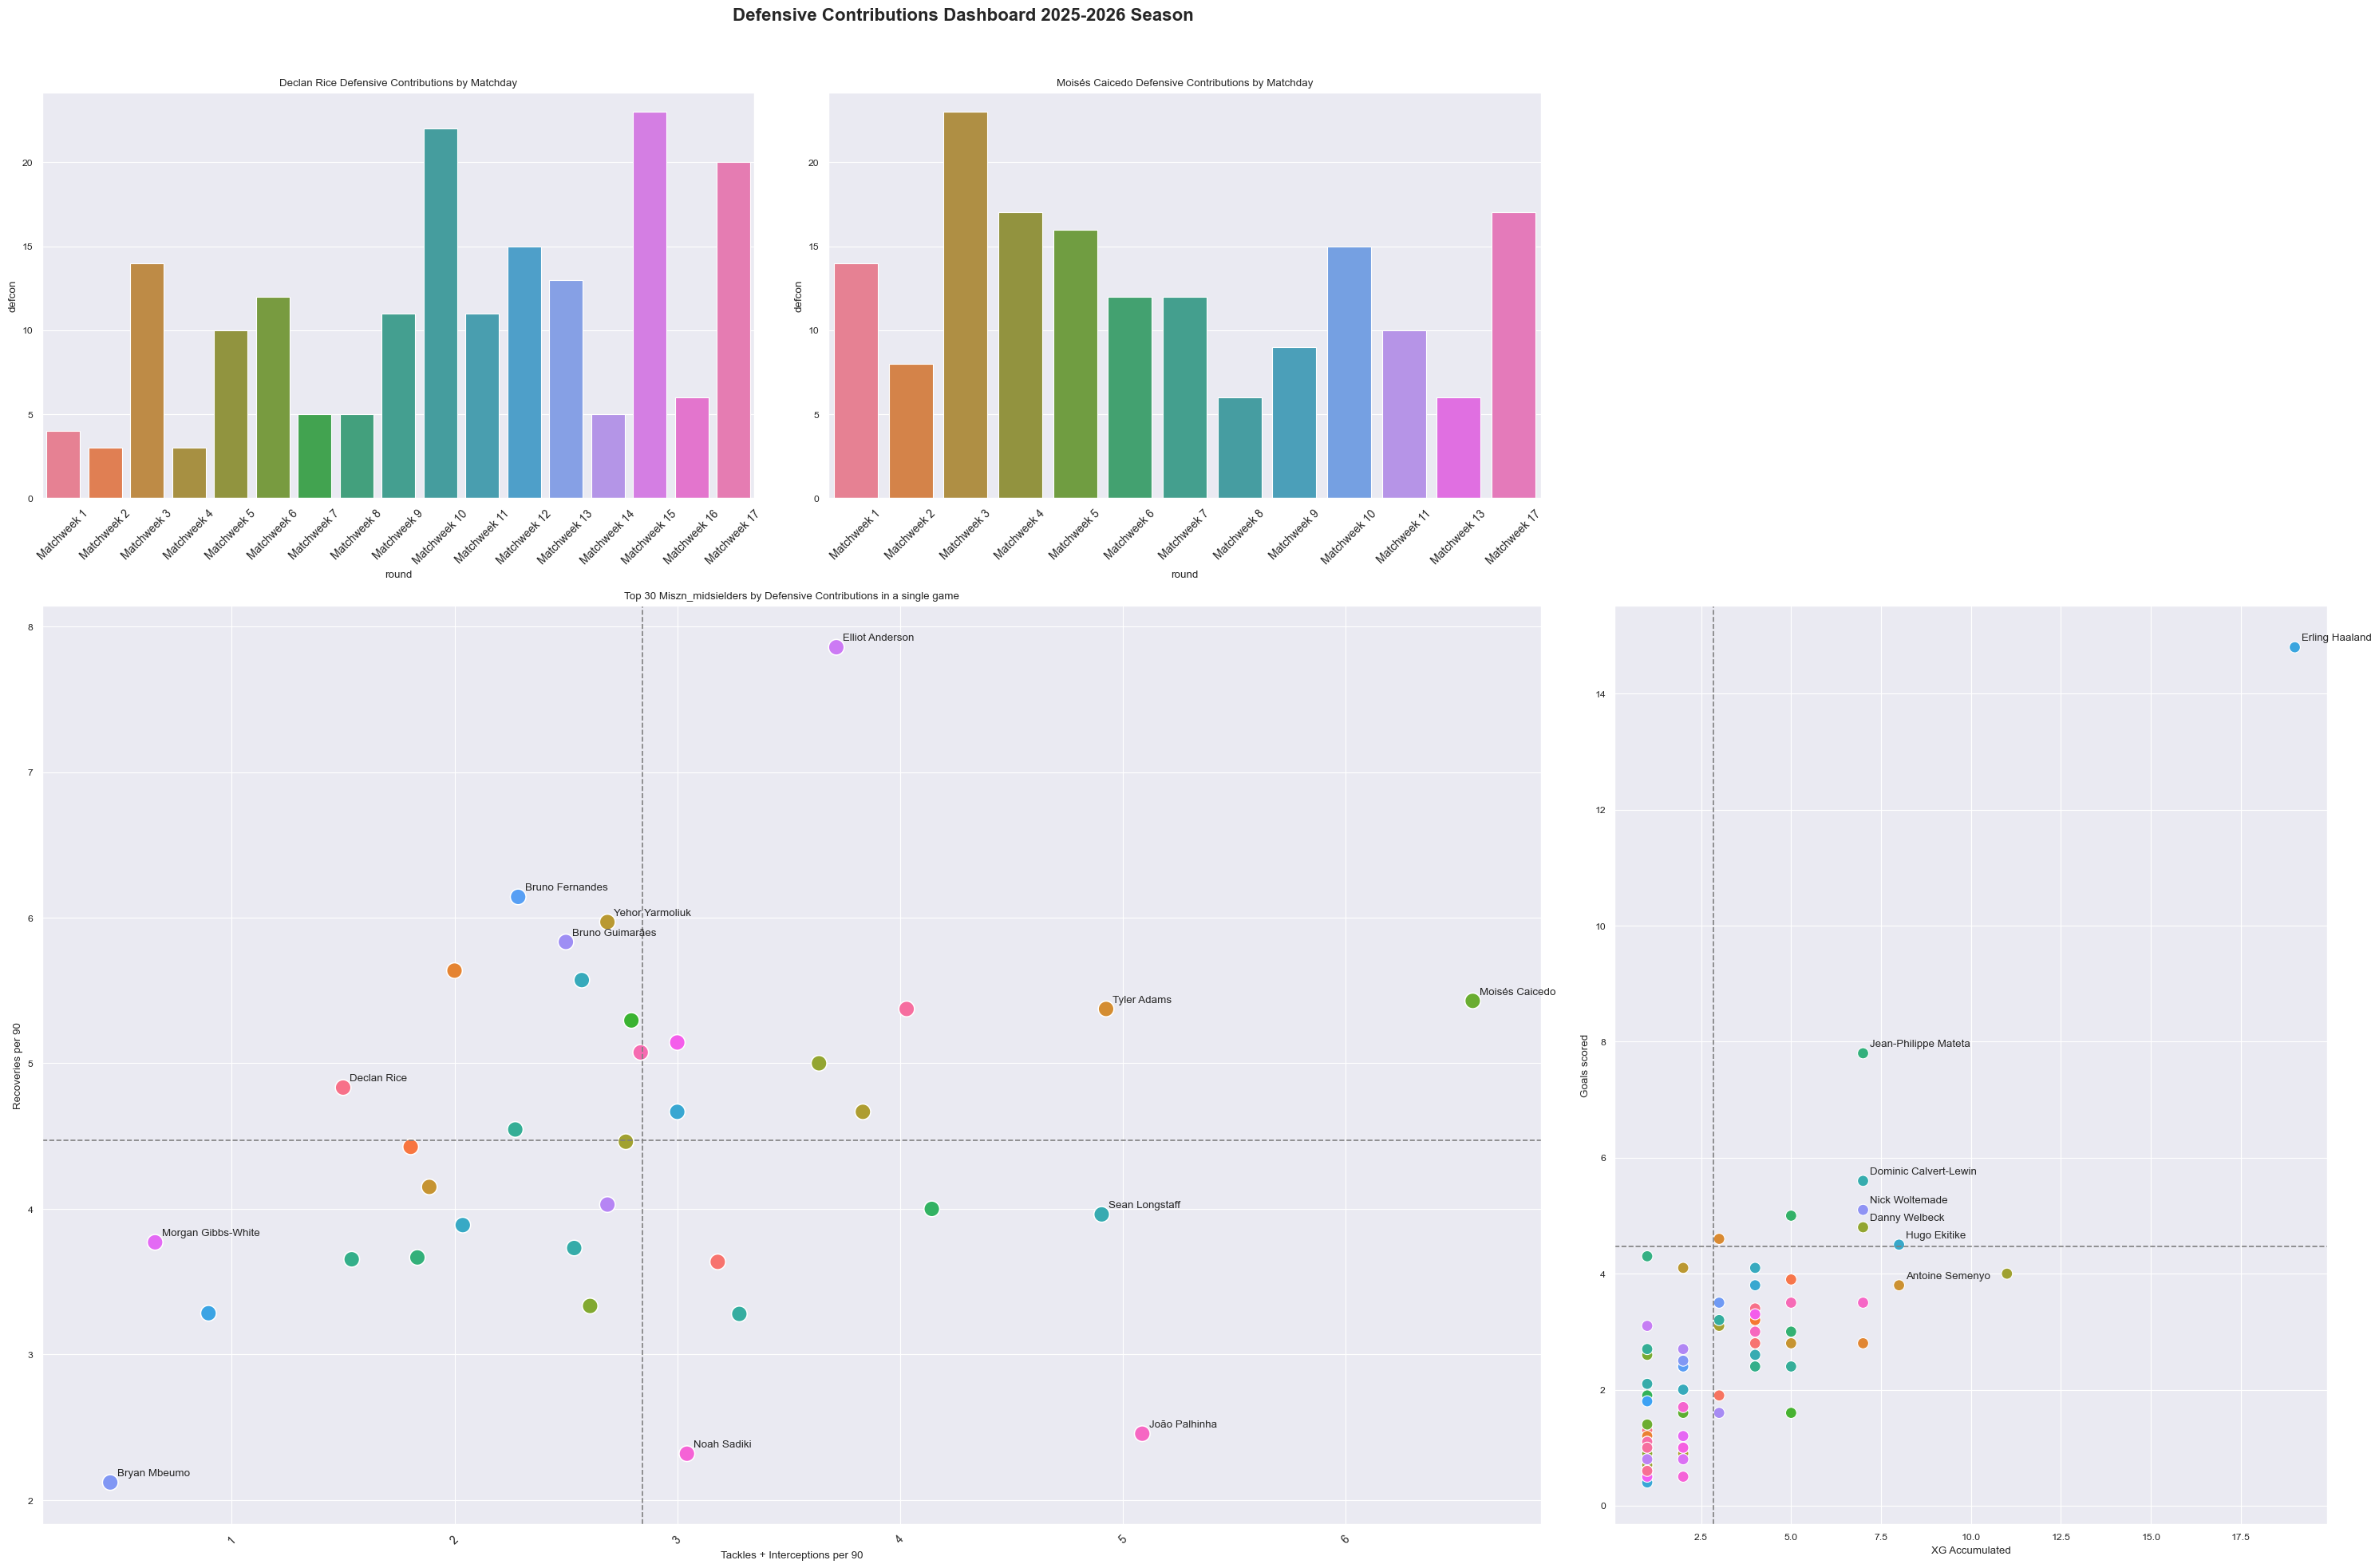

In [235]:
# Chart of Most defensive contributions this season and the matchday they were made in

x_2024_med = szn_mids["tkl_int/90"].mean()
y_2024_med = szn_mids["recov/90"].mean()

regions = [
    ("Low Carries • Low Prog Dist",    (0.15, 0.15)),  # bottom-left
    ("Low Carries • High Prog Dist", (0.15, 0.85)),  # top-left
    ("High Carries • High Prog Dist",  (0.85, 0.85)),  # top-right
    ("High Carries • Low Prog Dist",   (0.85, 0.15)),  # bottom-right
]


#Styling the scatter plot
sns.set_theme(
    style="darkgrid",
    context="paper",
    palette="colorblind"
    )
#sns.set_style("ticks")
sns.despine()
fig = plt.figure(figsize=(30, 20))

ax1 = plt.subplot2grid((3, 3), (0, 0), colspan=1)
ax2 = plt.subplot2grid((3, 3), (0, 1), colspan=1)
ax3 = plt.subplot2grid((3, 3), (1, 0), colspan=2, rowspan=2)
ax4 = plt.subplot2grid((3, 3), (1, 2), colspan=2, rowspan=2)

# create two subplots (axes array) so ax[0] and ax[1] are valid
#fig, ax = plt.subplots(nrows=2,ncols=2, figsize=(30, 20), sharey=True)
fig.suptitle("Defensive Contributions Dashboard 2025-2026 Season", fontsize=16, fontweight='bold', ha='right')

sns.barplot(data=rice, x='round', y='defcon', hue="round", ax=ax1)
ax1.set_title("Declan Rice Defensive Contributions by Matchday")
# rotate x tick labels correctly
ax1.tick_params(axis='x', rotation=45, labelsize=10, direction='out')

sns.barplot(data=caicedo, x='round', y='defcon', hue="round", ax=ax2)
ax2.set_title("Moisés Caicedo Defensive Contributions by Matchday")
ax2.tick_params(axis='x', rotation=45, labelsize=10, direction='out')

#Scatterplot of the different archetypes of miszn_midsielders

sns.scatterplot(data=szn_mids, x='tkl_int/90', y='recov/90', hue="player", s=200, ax=ax3, legend=False)
ax3.set_title("Top 30 Miszn_midsielders by Defensive Contributions in a single game")
ax3.tick_params(axis='x', rotation=45, labelsize=10, direction='out')
ax3.axvline(x=x_2024_med, color='grey', linestyle='--')
ax3.axhline(y=y_2024_med, color='grey', linestyle='--')
ax3.set_xlabel("Tackles + Interceptions per 90")
ax3.set_ylabel("Recoveries per 90")

# 1) thresholds (example for axis-based)
x90 = szn_mids["tkl_int/90"].quantile(0.90)
y90 = szn_mids["recov/90"].quantile(0.90)
x05 = szn_mids["tkl_int/90"].quantile(0.05)
y05 = szn_mids["recov/90"].quantile(0.05)

top_mask = (szn_mids["tkl_int/90"] >= x90) | (szn_mids["recov/90"] >= y90)
bot_mask = (szn_mids["tkl_int/90"] <= x05) | (szn_mids["recov/90"] <= y05)

auto_mask = top_mask | bot_mask

# --- Manual "must label" players (you choose these) ---
must_label = {"Rodri", "Declan Rice", "Moisés Caicedo"}  # example
manual_mask = szn_mids["player"].isin(must_label)

# --- Combined mask: label if auto standout OR manually selected ---
label_mask = auto_mask | manual_mask
standouts = szn_mids[label_mask].copy()

# 3) annotate just those points
for _, r in standouts.iterrows():
    ax3.annotate(
        r["player"],
        (r["tkl_int/90"], r["recov/90"]),
        textcoords="offset points",
        xytext=(6, 6),   # small offset so label doesn't sit on the dot
        ha="left"
    )


sns.scatterplot(data=forwards, x='gls', y='npxg', hue="player", s=100, ax=ax4, legend=False)
ax4.axvline(x=x_2024_med, color='grey', linestyle='--')
ax4.axhline(y=y_2024_med, color='grey', linestyle='--')
ax4.set_xlabel("XG Accumulated")
ax4.set_ylabel("Goals scored")

# 1) thresholds (example for axis-based)
x90 = forwards["gls"].quantile(0.90)
y90 = forwards["npxg"].quantile(0.90)
x05 = forwards["gls"].quantile(0.05)
y05 = forwards["npxg"].quantile(0.05)

top_mask = (forwards["gls"] >= x90) & (forwards["npxg"] >= y90)
#bot_mask = (forwards["gls"] <= x05) & (forwards["npxg"] <= y05)

auto_mask = top_mask | bot_mask

# --- Manual "must label" players (you choose these) ---
must_label = {"Antoine Semenyo", "Erling Haaland"}  # example
manual_mask = forwards["player"].isin(must_label)

# --- Combined mask: label if auto standout OR manually selected ---
label_mask = auto_mask | manual_mask
standouts = forwards[label_mask].copy()

# 3) annotate just those points
for _, r in standouts.iterrows():
    ax4.annotate(
        r["player"],
        (r["gls"], r["npxg"]),
        textcoords="offset points",
        xytext=(6, 6),   # small offset so label doesn't sit on the dot
        ha="left"
    )
    
plt.tight_layout(rect=(0, 0, 1, 0.96))







C:\Users\oukan\AppData\Local\Temp\ipykernel_80436\2578957968.py:36: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



<Figure size 640x480 with 0 Axes>

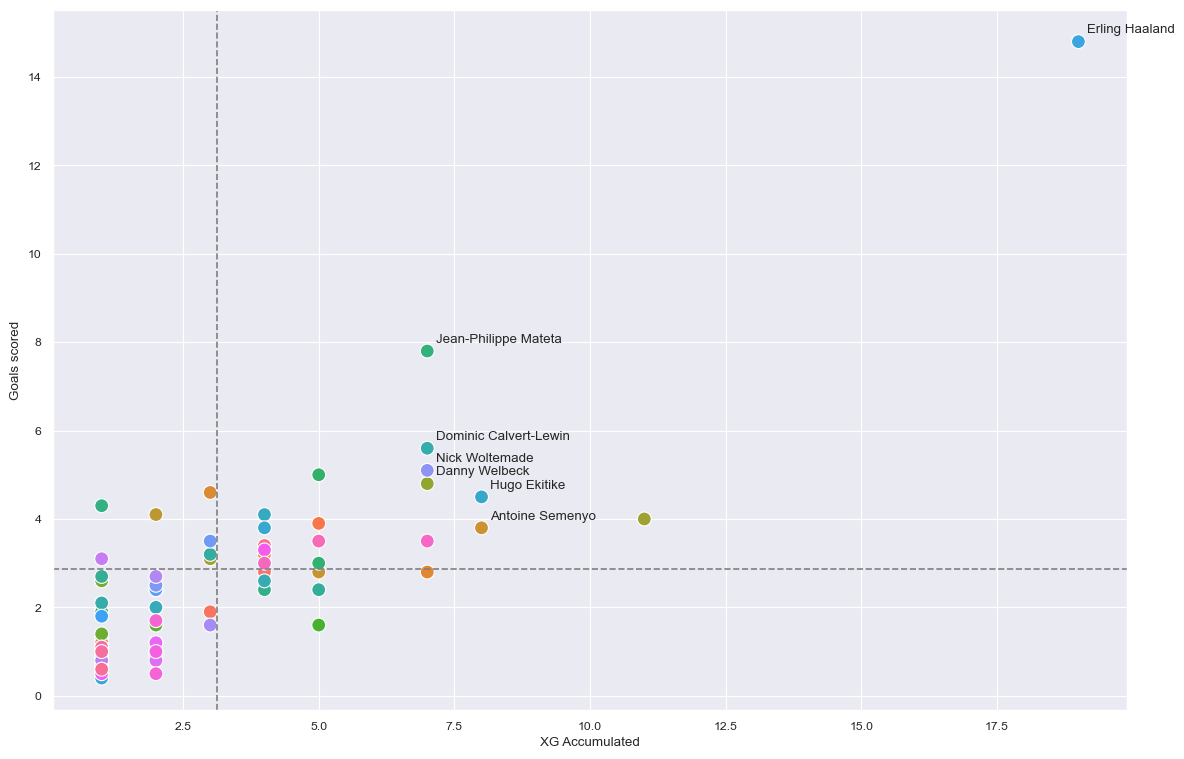

In [236]:

x_2024_med = forwards["gls"].mean()
y_2024_med = forwards["xg"].mean()

sns.set_theme(
    style="darkgrid",
    context="paper",
    palette="colorblind"
    )
#sns.set_style("ticks")
sns.despine()
fig, ax = plt.subplots(figsize=(12, 8))

sns.scatterplot(data=forwards, x='gls', y='npxg', hue="player", s=100, ax=ax, legend=False)
ax.axvline(x=x_2024_med, color='grey', linestyle='--')
ax.axhline(y=y_2024_med, color='grey', linestyle='--')
ax.set_xlabel("XG Accumulated")
ax.set_ylabel("Goals scored")

# 1) thresholds (example for axis-based)
x90 = forwards["gls"].quantile(0.90)
y90 = forwards["npxg"].quantile(0.90)
x05 = forwards["gls"].quantile(0.05)
y05 = forwards["npxg"].quantile(0.05)

top_mask = (forwards["gls"] >= x90) & (forwards["npxg"] >= y90)
#bot_mask = (forwards["gls"] <= x05) & (forwards["npxg"] <= y05)

auto_mask = top_mask | bot_mask

# --- Manual "must label" players (you choose these) ---
must_label = {"Antoine Semenyo", "Erling Haaland"}  # example
manual_mask = forwards["player"].isin(must_label)

# --- Combined mask: label if auto standout OR manually selected ---
label_mask = auto_mask | manual_mask
standouts = forwards[label_mask].copy()

# 3) annotate just those points
for _, r in standouts.iterrows():
    ax.annotate(
        r["player"],
        (r["gls"], r["npxg"]),
        textcoords="offset points",
        xytext=(6, 6),   # small offset so label doesn't sit on the dot
        ha="left"
    )

plt.tight_layout(rect=(0, 0, 1, 0.96))

In [237]:
#creating a new column called ppda (passes completed per opponent defensive action)

#The Data
matchday = pd.read_csv("../data/processed/fbref/ENG-Premier League/2025-2026/team_match/defense.csv")
passing = pd.read_csv("../data/processed/fbref/ENG-Premier League/2025-2026/team_match/passing.csv")
matchday_df = pd.DataFrame(matchday)
passing_df = pd.DataFrame(passing)

passing_df.rename(columns={'cmp':'pass_cmp'}, inplace=True)
#merge the two dataframes on team and game id
ppda_df = matchday_df.merge(passing_df[['team', 'game_id',"pass_cmp"]], left_on=['team', 'game_id'], right_on=['team', 'game_id'], how='left')

#for each game, locate the opponents defensive actions
ppda_df['tkl'] = ppda_df['tkl'].fillna(0)
ppda_df['int'] = ppda_df['int'].fillna(0)
ppda_df['clr'] = ppda_df['clr'].fillna(0)
ppda_df['blocks'] = ppda_df['blocks'].fillna(0)

ppda_df['def_actions'] = ppda_df['tkl'] + ppda_df['int'] + ppda_df['clr'] + ppda_df['blocks']

opponent = ppda_df[['team', 'game_id', 'def_actions', 'pass_cmp']].copy()
opponent.rename(columns={'team':'opponnent', 'def_actions':'opp_def_actions', 'pass_cmp':'opp_cmp'}, inplace=True)

ppda_df = ppda_df.merge(opponent, on='game_id', how='left')


ppda_df = ppda_df[ppda_df['team'] != ppda_df['opponnent']]


ppda_df['PRI'] = ppda_df['pass_cmp'] / ppda_df['opp_def_actions'] #Press Resistance Index (passes completed per opponent defensive action)
ppda_df['ppda'] = ppda_df['opp_cmp'] / ppda_df['def_actions'] #Passes allowed per defensive action (PPDA)

team = ppda_df[ppda_df['team'] == 'BOU']
#display(team[['team', "opponnent", 'round', 'game_id', 'ppda', 'PRI','pass_cmp', 'opp_cmp', 'def_actions', 'opp_def_actions' ]])


#Total of opp cmp and opp_def_actions for each team 
team_totals = ppda_df.groupby('opponnent').agg({'opp_cmp':'sum', 'opp_def_actions':'sum'}).reset_index()
team_totals['ppda'] = team_totals['opp_cmp'] / team_totals['opp_def_actions']
team_totals = team_totals.sort_values(by='opp_cmp', ascending=False)
display(team_totals)


,opponnent,opp_cmp,opp_def_actions,ppda
12,MCI,9963,1058,9.416824
11,LIV,9457,1119,8.451296
6,CHE,9004,1082,8.321627
0,ARS,8483,1034,8.204062
9,FUL,7927,1235,6.418623
2,BHA,7772,1153,6.740676
14,NEW,7623,1130,6.746018
15,NFO,7546,1143,6.601925
13,MUN,7529,1196,6.295151
1,AVL,7209,1048,6.878817


In [238]:
fig = px.scatter(team, x='PRI', y='ppda', color="opponnent", title="Arsenal PPDA vs PRI by Matchday 2025-2026 Season", labels={'ppda': 'PPDA (Passes Allowed per Defensive Action)', 'PRI': 'Passes Completed per Opp Defensive Action'})
fig.show()

In [239]:
# --- Load ---
matchday_df = pd.read_csv("../data/processed/fbref/ENG-Premier League/2025-2026/team_match/defense.csv")
passing_df  = pd.read_csv("../data/processed/fbref/ENG-Premier League/2025-2026/team_match/passing.csv")

# --- Keep only what you need + rename ---
passing_df = passing_df.rename(columns={"cmp": "pass_cmp"})

ppda_df = matchday_df.merge(
    passing_df[["team", "game_id", "pass_cmp"]],
    on=["team", "game_id"],
    how="left",
    validate="one_to_one"  # IMPORTANT: fails fast if you accidentally have duplicates
)

# --- Defensive actions (fill missing -> 0) ---
for c in ["tkl", "int", "clr", "blocks"]:
    if c not in ppda_df.columns:
        raise KeyError(f"Missing required column: {c}")
    ppda_df[c] = pd.to_numeric(ppda_df[c], errors="coerce").fillna(0)

ppda_df["pass_cmp"] = pd.to_numeric(ppda_df["pass_cmp"], errors="coerce").fillna(0)
ppda_df["def_actions"] = ppda_df["tkl"] + ppda_df["int"]

# --- Invariant: exactly 2 teams per game_id ---
counts = ppda_df.groupby("game_id")["team"].nunique()
bad = counts[counts != 2]
if not bad.empty:
    raise ValueError(f"Expected exactly 2 teams per game_id. Bad game_ids (sample): {bad.index.tolist()[:10]}")

# --- Opponent mapping via self-merge ---
opp = ppda_df[["game_id", "team", "def_actions", "pass_cmp"]].copy()
opp = opp.rename(columns={
    "team": "opponnent",
    "def_actions": "opp_def_actions",
    "pass_cmp": "opp_cmp"
})

ppda_df = ppda_df.merge(opp, on="game_id", how="left")

# keep only the "other team" row
ppda_df = ppda_df[ppda_df["team"] != ppda_df["opponnent"]].copy()

# --- Per-match metrics ---
# PRI: passes completed per opponent defensive action (your "press resistance index")
ppda_df["PRI"] = np.where(ppda_df["opp_def_actions"] > 0,
                          ppda_df["pass_cmp"] / ppda_df["opp_def_actions"],
                          np.nan)

# PPDA proxy: opponent passes completed per your defensive action
ppda_df["ppda"] = np.where(ppda_df["def_actions"] > 0,
                           ppda_df["opp_cmp"] / ppda_df["def_actions"],
                           np.nan)

# --- Season totals per team (THIS is what you meant) ---
team_totals = (
    ppda_df.groupby("team", as_index=False)
    .agg(
        pass_cmp_sum=("pass_cmp", "sum"),
        opp_cmp_sum=("opp_cmp", "sum"),
        def_actions_sum=("def_actions", "sum"),
        opp_def_actions_sum=("opp_def_actions", "sum"),
        matches=("game_id", "nunique"),
    )
)

team_totals["PRI"] = np.where(team_totals["opp_def_actions_sum"] > 0,
                              team_totals["pass_cmp_sum"] / team_totals["opp_def_actions_sum"],
                              np.nan)

team_totals["ppda"] = np.where(team_totals["def_actions_sum"] > 0,
                               team_totals["opp_cmp_sum"] / team_totals["def_actions_sum"],
                               np.nan)

team_totals = team_totals.sort_values("ppda", ascending=True)  # lower ppda = more intense pressing
display(team_totals)




,team,pass_cmp_sum,opp_cmp_sum,def_actions_sum,opp_def_actions_sum,matches,PRI,ppda
6,CHE,9004,5792,495,510,19,17.654902,11.701010
3,BOU,6853,6350,504,463,19,14.801296,12.599206
13,MUN,7529,6404,498,486,19,15.491770,12.859438
0,ARS,8483,5572,429,435,19,19.501149,12.988345
17,TOT,6924,6765,512,525,19,13.188571,13.212891
2,BHA,7772,6930,499,541,19,14.365989,13.887776
11,LIV,9457,5270,377,484,19,19.539256,13.978780
19,WOL,6337,8173,543,432,19,14.668981,15.051565
9,FUL,7927,7320,485,461,19,17.195228,15.092784
15,NFO,7546,7186,476,479,19,15.753653,15.096639


In [240]:
fig = px.scatter(
    team_totals,
    x='ppda', 
    y='PRI',
    text='team',
    title="Premier League PPDA vs Build-Up for 2025-2026 Season", 
    labels={'ppda': 'PPDA (Passes Allowed per Defensive Action)', 'PRI': 'Passes Completed per Opp Defensive Action'}
    )
fig.update_traces(showlegend=False, name='team', textposition='top center', marker_size=10)

#add median lines
hmean = team_totals['ppda'].mean()
vmean = team_totals['PRI'].mean()

hmax = team_totals['ppda'].max()
vmax = team_totals['PRI'].max()

hmin = team_totals['ppda'].min()
vmin = team_totals['PRI'].min()



x_mean = team_totals["ppda"].mean()
y_mean = team_totals["PRI"].mean()

x_min, x_max = team_totals["ppda"].min(), team_totals["ppda"].max()
y_min, y_max = team_totals["PRI"].min(), team_totals["PRI"].max()

fig.add_vline(x=x_mean, line_dash="dash", line_color="#00FF41", line_width=1)
fig.add_hline(y=y_mean, line_dash="dash", line_color="#00FF41", line_width=0.5)


# Quadrant rectangles (use shapes)
def add_quad(x0, x1, y0, y1, color, opacity):
    fig.add_shape(
        type="rect",
        x0=x0, x1=x1, y0=y0, y1=y1,
        fillcolor=color, opacity=opacity,
        line_width=0, layer="below"
    )

add_quad(x_min, x_mean, y_min, y_mean, "#F1C40F", 0.18)   # low ppda, low pri
add_quad(x_min, x_mean, y_mean, y_max, "#2ECC71", 0.28)   # low ppda, high pri
add_quad(x_mean, x_max, y_mean, y_max, "#3498DB", 0.18)    # high ppda, high pri
add_quad(x_mean, x_max, y_min, y_mean, "#E74C3C", 0.18)   # high ppda, low pri

#Quadrant Labels
fig.add_annotation(
    x=x_min + (x_mean - x_min) / 2,
    y=y_min + (y_mean - y_min) / 4,
    text="Chaotic Pressers<br>",
    showarrow=False,
    font=dict(size=12, color="Beige"),
    align="center"
)

fig.add_annotation(
    x=x_min + (x_mean - x_min) / 2,
    y=y_max + (y_mean - y_max) / 2,
    text="Dominant Forces<br>",
    showarrow=False,
    font=dict(size=12, color="Beige"),
    align="center"
)

fig.add_annotation(
    x=x_max + (x_mean - x_max) / 2,
    y=y_max + (y_mean - y_max) / 2,
    text="Passive Controllers<br>",
    showarrow=False,
    font=dict(size=12, color="Beige"),
    align="center"
)

fig.add_annotation(
    x=x_max + (x_mean - x_max) / 2,
    y=y_min + (y_mean - y_min) / 2,
    text="Passive & Limited<br>",
    showarrow=False,
    font=dict(size=12, color="Beige"),
    align="center"
)




#Graph Layout
fig.update_layout(
    height=600,
    width=900,
     title=dict(
            font=dict(size=20, color="Beige"),
            text= "Premier League Pressing vs Build-Up for 2025-2026 Season",
            x=0.5
        ),
    legend = dict(
        title="Team"
        ),
    font=dict(
        family="Courier New, monospace",
        size=10,
        color="Beige"
    ),
    margin=dict(l=40, r=40, t=60, b=40),
    paper_bgcolor="#0B0F0C", autosize=False, plot_bgcolor = '#0B0F0C',
    xaxis=dict(
        title="PPDA (Passes Allowed per Defensive Action)",
        showgrid=False,
        gridcolor='rgba(0,255,65,0.15)',
        zeroline=False,
        linecolor='Beige',
        tickcolor= 'Beige',
    ),

    yaxis=dict(
        title="PRI (Passes Completed per Opp Defensive Action)",
        showgrid=False,
        gridcolor='rgba(0,255,65,0.15)',
        zeroline=False,
        linecolor='Beige',
        tickcolor= 'Beige',
    )
        
)

#add caption at the bottom of the chart
fig.add_annotation(
        text="Data Source: FBref | @cartierkuti",
        xref="paper", yref="paper",
        x=0, y=-0.1,
        showarrow=False,
        font=dict(size=10, color="Beige"),
)


fig.show()

In [ ]:
#Team Possession Efficiency Chart for Premier League 2025-2026 Season
#--- Load Data---
possession_df  = pd.read_csv("../data/processed/fbref/ENG-Premier League/2025-2026/team_season/possession.csv")
passing_df  = pd.read_csv("../data/processed/fbref/ENG-Premier League/2025-2026/team_season/passing.csv")
shooting_df  = pd.read_csv("../data/processed/fbref/ENG-Premier League/2025-2026/team_season/shooting.csv")

# --- Keep only what you need + rename ---
passing_df = passing_df.rename(columns={"cmp": "pass_cmp", "1_3":"1_3pass", "totdist":"totpassdist", "prgdist":"prgpassdist"})
possession_df = possession_df.rename(columns={"1_3":"1_3carry", "totdist":"totcarrydist", "prgdist":"prgcarrydist"})
possession_df = pd.DataFrame(possession_df)
passing_df = pd.DataFrame(passing_df)
shooting_df = pd.DataFrame(shooting_df)


merged_df = possession_df.merge(
    passing_df[["team_id","pass_cmp", "xa", 'totpassdist', 'prgpassdist', 'short_cmp', 'att_att', 'medium_cmp',
       'medium_att', 'long_cmp', 'long_att', 'ast', 'xag', 'a_xag', 'kp',
       '1_3pass', 'ppa', 'crspa', 'prgp']], on=["team_id"], how="left",
    validate="one_to_one"  # IMPORTANT: fails fast if you accidentally
)

merged_df = merged_df.merge(
    shooting_df[["team_id",'gls', 'sh', 'sot',
       'sot_sot', 'sh_90', 'sot_90', 'g_sh', 'g_sot', 'dist', 'fk', 'pk',
       'pkatt', 'xg', 'npxg', 'npxg_sh', 'g_xg', 'np_g_xg']], on=["team_id"], how="left",
    validate="one_to_one"  # IMPORTANT: fails fast if you accidentally
)

merged_df.drop(columns=['players_used', 'is_relegated','url'], inplace=True)
merged_df.rename(columns={'succ_succ':'succ_pct', 'tkld_tkld':'tkld_pct','dist': 'sh_dist'}, inplace=True)

merged_df.dropna(inplace=True)
display(merged_df.columns)  

#---- Calculate possession efficiency metrics ----
merged_df['carry_pct'] = merged_df['prgcarrydist'] / merged_df['totcarrydist']
merged_df['pass_eff'] = merged_df['prgp'] / merged_df['pass_cmp']
merged_df['xG_100'] = merged_df['npxg'] / (merged_df['pass_cmp'] / 100) #npxg created per 100 passes

merged_df['cpa_90'] = merged_df['cpa'] / merged_df['90s']  #Carries into penalty area per 90
merged_df['ppa_90'] = merged_df['ppa'] / merged_df['90s']  #Passes into penalty area per 90
merged_df['pass_90'] = merged_df['pass_cmp'] / merged_df['90s']  #Key Passes per 90

merged_df['npxg_90'] = merged_df['npxg'] / merged_df['90s']  #Non-Penalty Expected Goals per 90

merged_df['pot_threat90'] = 100 *(merged_df['cpa_90'] + merged_df['ppa_90']) / merged_df['pass_90']  #Potential Threat per 90
merged_df['real_threat90'] = 100 * merged_df['npxg_90'] / merged_df['pass_90']  #Real Threat per 90
merged_df['pot_threat'] = 100 * (merged_df['cpa'] + merged_df['ppa']) / merged_df['pass_cmp']  #Potential Threat per 100 passes
merged_df['real_threat'] = 100 * merged_df['npxg'] / merged_df['pass_cmp']  #Real Threat per 100 passes


display(merged_df[['team', '90s', 'carry_pct', 'pass_90', 'pass_cmp', 'xG_100', 'pot_threat', 'pot_threat90', 'real_threat', 'real_threat90', "npxg_sh", 'sh_dist']].sort_values(by='real_threat', ascending=False))


#plot the chart

fig = px.scatter(
    merged_df,
    x='pot_threat', 
    y='real_threat',
    text='team',
    color='npxg_sh',
    title="Premier League Team Possession Efficiency 2025-2026 Season", 
    labels={'pot_threat': 'Potential Threat per 100 Passes', 'real_threat': 'Real Threat per 100 Passes'}
    )

#Graph Layout
fig.update_layout(
    height=600,
    width=900,
     title=dict(
            font=dict(size=20, color="Beige"),
            text= "Premier League Possession Efficiency for 2025-2026 Season",
            x=0.5
        ),
    legend = dict(
        title="Team"
        ),
    font=dict(
        family="Courier New, monospace",
        size=10,
        color="Beige"
    ),
    margin=dict(l=40, r=40, t=60, b=40),
    paper_bgcolor="#0B0F0C", autosize=False, plot_bgcolor = '#0B0F0C',
    xaxis=dict(
        title="'pot_threat': 'Potential Threat per 100 Passes",
        showgrid=False,
        gridcolor='rgba(0,255,65,0.15)',
        zeroline=False,
        linecolor='Beige',
        tickcolor= 'Beige',
    ),

    yaxis=dict(
        title="'real_threat': 'Real Threat per 100 Passes",
        showgrid=False,
        gridcolor='rgba(0,255,65,0.15)',
        zeroline=False,
        linecolor='Beige',
        tickcolor= 'Beige',
    )
        
)
fig.update_traces(showlegend=False, name='team', textposition='top center', marker_size=10)
fig.write_image("../visualizations/possession_efficiency.png", scale=2)


Index(['league', 'season', 'team', 'poss', '90s', 'touches', 'def_pen',
       'def_3rd', 'mid_3rd', 'att_3rd', 'att_pen', 'live', 'att', 'succ',
       'succ_pct', 'tkld', 'tkld_pct', 'carries', 'totcarrydist',
       'prgcarrydist', 'prgc', '1_3carry', 'cpa', 'mis', 'dis', 'rec', 'prgr',
       'team_id', 'pass_cmp', 'xa', 'totpassdist', 'prgpassdist', 'short_cmp',
       'att_att', 'medium_cmp', 'medium_att', 'long_cmp', 'long_att', 'ast',
       'xag', 'a_xag', 'kp', '1_3pass', 'ppa', 'crspa', 'prgp', 'gls', 'sh',
       'sot', 'sot_sot', 'sh_90', 'sot_90', 'g_sh', 'g_sot', 'sh_dist', 'fk',
       'pk', 'pkatt', 'xg', 'npxg', 'npxg_sh', 'g_xg', 'np_g_xg'],
      dtype='object')

,team,90s,carry_pct,pass_90,pass_cmp,xG_100,pot_threat,pot_threat90,real_threat,real_threat90,npxg_sh,sh_dist
7,CRY,19,0.524462,311.789474,5924,0.472654,3.173531,3.173531,0.472654,0.472654,0.13,16.3
13,MUN,19,0.534770,396.263158,7529,0.406428,3.718953,3.718953,0.406428,0.406428,0.11,16.8
2,BOU,20,0.552467,356.400000,7128,0.398429,3.900112,3.900112,0.398429,0.398429,0.11,18.1
3,BRE,19,0.485855,318.947368,6060,0.372937,3.201320,3.201320,0.372937,0.372937,0.13,15.0
0,ARS,20,0.531100,443.500000,8870,0.370913,3.675310,3.675310,0.370913,0.370913,0.12,15.3
10,LEE,19,0.518799,349.157895,6634,0.366295,2.864034,2.864034,0.366295,0.366295,0.11,16.1
8,EVE,19,0.495815,315.473684,5994,0.350350,3.703704,3.703704,0.350350,0.350350,0.11,16.2
12,MCI,19,0.539809,524.368421,9963,0.345278,3.553147,3.553147,0.345278,0.345278,0.13,15.7
6,CHE,19,0.532969,473.894737,9004,0.344291,3.209685,3.209685,0.344291,0.344291,0.12,16.6
4,BHA,20,0.548716,416.200000,8324,0.333974,3.087458,3.087458,0.333974,0.333974,0.11,18.3


In [242]:
#Team Pressing Charts for all leagues in 2025-2026 season
# --- Load ---
matchday_df = pd.read_csv("../data/processed/fbref/consolidate/2025-2026/team_match/defense.csv")
passing_df  = pd.read_csv("../data/processed/fbref/consolidate/2025-2026/team_match/passing.csv")

# --- Keep only what you need + rename ---
passing_df = passing_df.rename(columns={"cmp": "pass_cmp"})

ppda_df = matchday_df.merge(
    passing_df[["team", 'league', "game_id", "pass_cmp"]],
    on=["team", 'league', "game_id"],
    how="left",
    validate="one_to_one"  # IMPORTANT: fails fast if you accidentally have duplicates
)
#drop all rows where round is not containing Matchweek
ppda_df = ppda_df[ppda_df['round'].str.contains("Matchweek")]
# --- Defensive actions (fill missing -> 0) ---
for c in ["tkl", "int", "clr", "blocks"]:
    if c not in ppda_df.columns:
        raise KeyError(f"Missing required column: {c}")
    ppda_df[c] = pd.to_numeric(ppda_df[c], errors="coerce").fillna(0)

ppda_df["pass_cmp"] = pd.to_numeric(ppda_df["pass_cmp"], errors="coerce").fillna(0)
ppda_df["def_actions"] = ppda_df["tkl"] + ppda_df["int"]

# --- Invariant: exactly 2 teams per game_id ---
counts = ppda_df.groupby("game_id")["team"].nunique()
bad = counts[counts != 2]
if not bad.empty:
    raise ValueError(f"Expected exactly 2 teams per game_id. Bad game_ids (sample): {bad.index.tolist()[:10]}")

# --- Opponent mapping via self-merge ---
opp = ppda_df[["game_id", "team", "def_actions", "pass_cmp"]].copy()
opp = opp.rename(columns={
    "team": "opponnent",
    "def_actions": "opp_def_actions",
    "pass_cmp": "opp_cmp"
})


ppda_df = ppda_df.merge(opp, on="game_id", how="left")

# keep only the "other team" row
ppda_df = ppda_df[ppda_df["team"] != ppda_df["opponnent"]].copy()

display(ppda_df.columns)
# --- Per-match metrics ---
# PRI: passes completed per opponent defensive action (your "press resistance index")
ppda_df["PRI"] = np.where(ppda_df["opp_def_actions"] > 0,
                          ppda_df["pass_cmp"] / ppda_df["opp_def_actions"],
                          np.nan)

# PPDA proxy: opponent passes completed per your defensive action
ppda_df["ppda"] = np.where(ppda_df["def_actions"] > 0,
                           ppda_df["opp_cmp"] / ppda_df["def_actions"],
                           np.nan)

# --- Season totals per team (THIS is what you meant) ---
team_totals = (
    ppda_df.groupby("team", as_index=False)
    .agg(
        pass_cmp_sum=("pass_cmp", "sum"),
        opp_cmp_sum=("opp_cmp", "sum"),
        def_actions_sum=("def_actions", "sum"),
        opp_def_actions_sum=("opp_def_actions", "sum"),
        matches=("game_id", "nunique"),
        league=("league", "first"),
    )
)

team_totals["PRI"] = np.where(team_totals["opp_def_actions_sum"] > 0,
                              team_totals["pass_cmp_sum"] / team_totals["opp_def_actions_sum"],
                              np.nan)

team_totals["ppda"] = np.where(team_totals["def_actions_sum"] > 0,
                               team_totals["opp_cmp_sum"] / team_totals["def_actions_sum"],
                               np.nan)

team_totals = team_totals.sort_values("ppda", ascending=True)  # lower ppda = more intense pressing


fig = px.scatter(
    team_totals,
    x='ppda', 
    y='PRI',
    text='team',
    color='league',
    title="Premier League PPDA vs Build-Up for 2025-2026 Season", 
    labels={'ppda': 'PPDA (Passes Allowed per Defensive Action)', 'PRI': 'Passes Completed per Opp Defensive Action'}
    )
fig.update_traces(showlegend=False, name='team', textposition='top center', marker_size=10)

#add median lines
hmean = team_totals['ppda'].mean()
vmean = team_totals['PRI'].mean()

hmax = team_totals['ppda'].max()
vmax = team_totals['PRI'].max()

hmin = team_totals['ppda'].min()
vmin = team_totals['PRI'].min()



x_mean = team_totals["ppda"].mean()
y_mean = team_totals["PRI"].mean()

x_min, x_max = team_totals["ppda"].min(), team_totals["ppda"].max()
y_min, y_max = team_totals["PRI"].min(), team_totals["PRI"].max()

fig.add_vline(x=x_mean, line_dash="dash", line_color="#00FF41", line_width=1)
fig.add_hline(y=y_mean, line_dash="dash", line_color="#00FF41", line_width=0.5)


# Quadrant rectangles (use shapes)
def add_quad(x0, x1, y0, y1, color, opacity):
    fig.add_shape(
        type="rect",
        x0=x0, x1=x1, y0=y0, y1=y1,
        fillcolor=color, opacity=opacity,
        line_width=0, layer="below"
    )

add_quad(x_min, x_mean, y_min, y_mean, "#F1C40F", 0.18)   # low ppda, low pri
add_quad(x_min, x_mean, y_mean, y_max, "#2ECC71", 0.28)   # low ppda, high pri
add_quad(x_mean, x_max, y_mean, y_max, "#3498DB", 0.18)    # high ppda, high pri
add_quad(x_mean, x_max, y_min, y_mean, "#E74C3C", 0.18)   # high ppda, low pri

#Quadrant Labels
fig.add_annotation(
    x=x_min + (x_mean - x_min) / 2,
    y=y_min + (y_mean - y_min) / 4,
    text="Chaotic Pressers<br>",
    showarrow=False,
    font=dict(size=12, color="Beige"),
    align="center"
)

fig.add_annotation(
    x=x_min + (x_mean - x_min) / 2,
    y=y_max + (y_mean - y_max) / 2,
    text="Dominant Forces<br>",
    showarrow=False,
    font=dict(size=12, color="Beige"),
    align="center"
)

fig.add_annotation(
    x=x_max + (x_mean - x_max) / 2,
    y=y_max + (y_mean - y_max) / 2,
    text="Passive Controllers<br>",
    showarrow=False,
    font=dict(size=12, color="Beige"),
    align="center"
)

fig.add_annotation(
    x=x_max + (x_mean - x_max) / 2,
    y=y_min + (y_mean - y_min) / 2,
    text="Passive & Limited<br>",
    showarrow=False,
    font=dict(size=12, color="Beige"),
    align="center"
)




#Graph Layout
fig.update_layout(
    height=600,
    width=900,
     title=dict(
            font=dict(size=20, color="Beige"),
            text= "Premier League Pressing vs Build-Up for 2025-2026 Season",
            x=0.5
        ),
    legend = dict(
        title="Team"
        ),
    font=dict(
        family="Courier New, monospace",
        size=10,
        color="Beige"
    ),
    margin=dict(l=40, r=40, t=60, b=40),
    paper_bgcolor="#0B0F0C", autosize=False, plot_bgcolor = '#0B0F0C',
    xaxis=dict(
        title="PPDA (Passes Allowed per Defensive Action)",
        showgrid=False,
        gridcolor='rgba(0,255,65,0.15)',
        zeroline=False,
        linecolor='Beige',
        tickcolor= 'Beige',
    ),

    yaxis=dict(
        title="PRI (Passes Completed per Opp Defensive Action)",
        showgrid=False,
        gridcolor='rgba(0,255,65,0.15)',
        zeroline=False,
        linecolor='Beige',
        tickcolor= 'Beige',
    )
        
)

#add caption at the bottom of the chart
fig.add_annotation(
        text="Data Source: FBref | @cartierkuti",
        xref="paper", yref="paper",
        x=0, y=-0.1,
        showarrow=False,
        font=dict(size=10, color="Beige"),
)


fig.show(scale=3)
fig.write_image("../visualizations/europe_ppda.png", scale=2)


Index(['league', 'season', 'team', 'game', 'date', 'round', 'day', 'venue',
       'result', 'gf', 'ga', 'opponent', 'tkl', 'tklw', 'def_3rd', 'mid_3rd',
       'att_3rd', 'tkl_tkl', 'att', 'challenges_tkl', 'lost', 'blocks', 'sh',
       'pass', 'int', 'tkl_int', 'clr', 'err', 'time', 'match_report',
       'game_date', 'home', 'away', 'game_id', 'team_id', 'is_home', 'is_away',
       'opponent_id', 'is_relegated', 'pass_cmp', 'def_actions', 'opponnent',
       'opp_def_actions', 'opp_cmp'],
      dtype='object')